# Capstone 3: Making Predictions on Depletion of Five Natural Resources

## EDA Water-Oil Forecasting, Seismic Surveying and Impacts

#### Brief summary statistics

The previous notebook explored data from the Global Power Plant Database and the Statistical Review of World Energy (by BP). Some main discoveries includes:

I. Coal:
- Taiwan, South Korea, South Africa, and Malaysia are the top 4 countries with highest estimated electricity generation (in gwh) in 2017, respectively.
- Total world coal consumption reached its peak around 2012-2014; since then it declined, went up around 2016 and declined again in 2018. 
- China is the leading country in both coal consumption and coal production, leading in coal consumption from 1991-present and leading in coal production from 1994-present. US. holds second place.
- From 1965-2020, trend for coal consumption (EJ) is as follows:
a. Asia Pacific countries have a positive slope, with peak around 2018.
b. There is a downward slope seen from 1985-present for countries in Europe and Commonwealth of Independent States.
c. There is a downward slope seen from 2010 for North American countries and again around 2014.
- Ever since 2000, the world has been consuming more coal than it is producing coal, up until 2018 when world coal production surpassed world coal consumption.

II. Oil:
- Taiwan, Iraq, South Korea, and Japan are the top 4 countries with highest estimated electricity generation (in gwh) in 2017, respectively.
- Azerbaijan, Taiwan, Japan, and South Korea are the top 4 countries with highest capacity (mw). 
- Total world oil consumption reached its peak around 2018-2019, then hit a sharp downward slope after that. There was a sharp upward slope from 1965-1973, then a gradual decline around 1979-1984. 
- The U.S. is the leading country in both oil consumption and oil production, leading in oil consumption from 1974-present and in oil production from 2015-2019. It looks like we are short on production, consuming more oil than we are producing. 
- From 1965-2020, trend for oil consumption (barrels/day) is as follows:
a. North America held the top spot of oil consumption until around 2016, where Asia Pacific countries surpassed North American countries. Ever since then, Asia Pacific countries have dominated in oil consumption. All countries hit a decline in oil consumption around 2019. 
b. Only Commonwealth of Independent States had a downward decline in oil consumption from 1990-2000. 
c. Sharp increases in oil consumption happened in parallel from 1965-1973 for North American countries, the EU, and Asia Pacific countries. There was a decline for all three regions from 1978-1983.
d. African countries have the lowest oil consumption.
- There was a sharp decline in total world oil production around 1978-79 (the 1979 oil crisis, probably). It's not until 1990 that a gradual increase in oil production can be seen. At that year, consumption had exceeded production by about 1,000 barrels/day. Consumption has continually exceeded production by about 1,000-2,000 barrels/day. 
- At the end of 2000, Saudi Arabia held top spot for the most oil reserves.
- At the end of 2020, 2010, and 2019, Venezuela held top spot for the most oil reserves. In 2000, Venezuela was in 8th place. 

These patterns of consumption exceeding production could be a sign that we aren't able to keep up with the current population growth and meet its needs. 

## Supply and Demand

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import random

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from IPython.display import clear_output
from sklearn.metrics import mean_squared_error
from scipy import stats as st
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

In [5]:
path1 = r'C:\Users\yuvem\Downloads\Supply_Demand_Oil.xlsx'
xls = pd.ExcelFile(path1)
print(xls.sheet_names)

['Sheet1']


In [6]:
supply_demand = pd.read_excel(xls, 'Sheet1')

### Data Cleaning

In [7]:
supply_demand.to_excel('supply_demand.xlsx', index = False)

In [8]:
i = supply_demand[((supply_demand.Quarter == '2015 Q1'))].index
i

Int64Index([18], dtype='int64')

In [9]:
i2 = supply_demand[((supply_demand.Quarter == '2019 Q3'))].index
i2

Int64Index([0], dtype='int64')

In [10]:
supply_demand_19_15 = supply_demand.iloc[0:19]

In [11]:
supply_demand_19_15.to_excel('supply_demand_19_15.xlsx', index = False)

In [12]:
df_grouped = supply_demand_19_15.groupby('Quarter').sum()[['Oced_D_As % of World Demand', 'Oced_S_As % of World Supply', 'NOced_D_As % of World Demand', 'NOced_S_As % of World Supply', 'Total World Demand']]

In [13]:
# sort values
df_grouped = df_grouped.sort_values('Quarter')

In [14]:
# Gives preliminary view of the data
def brief_summary(df):
    print(df.head())
    print(df.isnull().sum()/len(df))
    print(df.info())
    print(df.describe())
    print(df.hist())
    
def heat_map(df):
    _= plt.figure(figsize=(14,10))
    heatmap = sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
    return plt.show()

# Taking testing and training data sets of features and target, normalizes it, then fits into a linear regression model. 
# Also outputs R2, RMSE, and mean predicted scores
def lin_reg(X_train, X_test, y_train, y_test):
    to_normalize = ['Total Gas (Mmcf)','Produced Water (bbl/year)']
    scaler = StandardScaler()
    scaler.fit(X_train[to_normalize])
    X_train.loc[:,to_normalize] = scaler.transform(X_train[to_normalize])
    X_test.loc[:,to_normalize] = scaler.transform(X_test[to_normalize])
    lr = LinearRegression().fit(X_train,y_train)
    predicted_values = lr.predict(X_test)
    print('R2', lr.score(X_test, y_test))
    print('RMSE:', np.sqrt(mean_squared_error(y_test, predicted_values)))
    print('Average Volume of Predicted Reserve:',predicted_values.mean() )
    return predicted_values

#This function calculates the profit generated based on the volume of oil in a particular region.
def profit(target, probabilities):
    target = pd.Series(target).reset_index(drop=True)
    probabilities = pd.Series(probabilities)
    probs_sorted = probabilities.sort_values(ascending=False)
    selected = target[probs_sorted.index][:n_best]
    return (selected.sum()* (price*unit)) - bud

In [15]:
# Save 
df_grouped.to_excel('df_grouped.xlsx', index = False)

         Oced_D_As % of World Demand  Oced_S_As % of World Supply  \
Quarter                                                             
2015 Q1                    49.447407                    28.272598   
2015 Q2                    48.017513                    27.715072   
2015 Q3                    48.569461                    27.848792   
2015 Q4                    48.373575                    28.040977   
2016 Q1                    48.776758                    28.076660   

         NOced_D_As % of World Demand  NOced_S_As % of World Supply  \
Quarter                                                               
2015 Q1                     50.552593                     71.734364   
2015 Q2                     51.982487                     72.281487   
2015 Q3                     51.430539                     72.147800   
2015 Q4                     51.626425                     71.959023   
2016 Q1                     51.223242                     71.919918   

         Total Wor

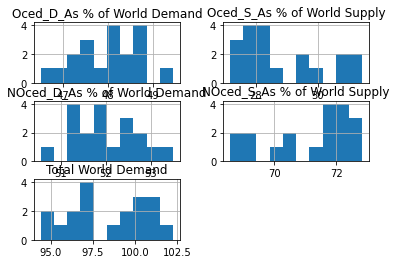

In [16]:
brief_summary(df_grouped)

In [17]:
mean_oecd_supply = round(np.mean(df_grouped['Oced_S_As % of World Supply']), 2)
std_oecd_supply = round(np.std(df_grouped['Oced_S_As % of World Supply']), 2)
max_oecd_supply = round(np.max(df_grouped['Oced_S_As % of World Supply']), 2)

In [18]:
from scipy.stats import t

n = len(df_grouped['Oced_S_As % of World Supply'])
t_critical = t.ppf(0.95, n-1)
t_critical

1.7340636066175354

In [19]:
moe = round(t_critical * (std_oecd_supply/np.sqrt(n)), 2)
ci = [mean_oecd_supply - moe, mean_oecd_supply + moe]
print(f"The margin of error is {moe} and the confidence interval is {ci}")

The margin of error is 0.54 and the confidence interval is [28.3, 29.38]


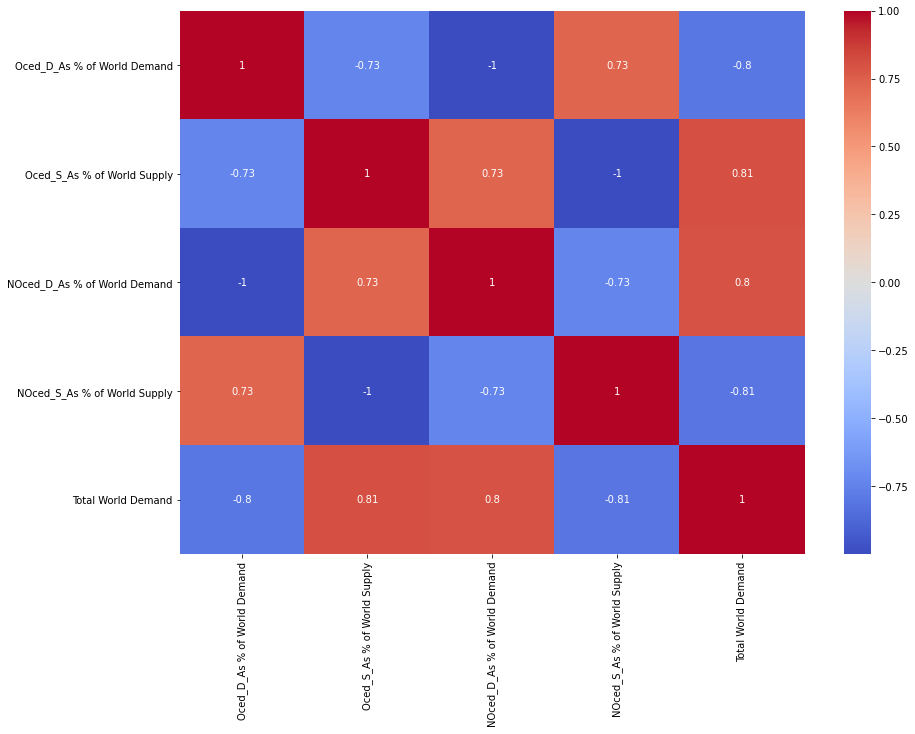

In [20]:
heat_map(df_grouped)

## Tableau

Using Tableau, I created a stacked bar chart with OCED % World Demand, Non-OECD % World Demand, and OCED % World Supply and Non-OECD % World Supply. The next stacked bar chart shows net deficit surplus for OECD, U.S. and China. 

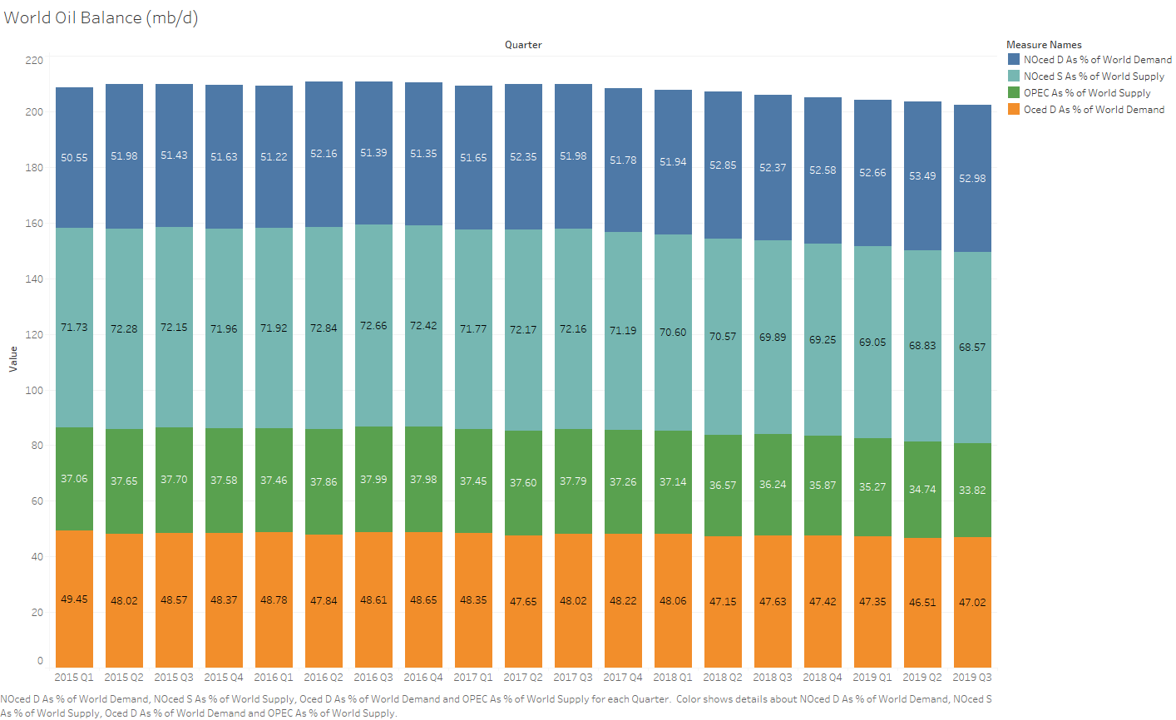

In [21]:
from IPython.display import Image
Image(r"C:\Users\yuvem\OneDrive\Pictures\world_oil_balance.png")

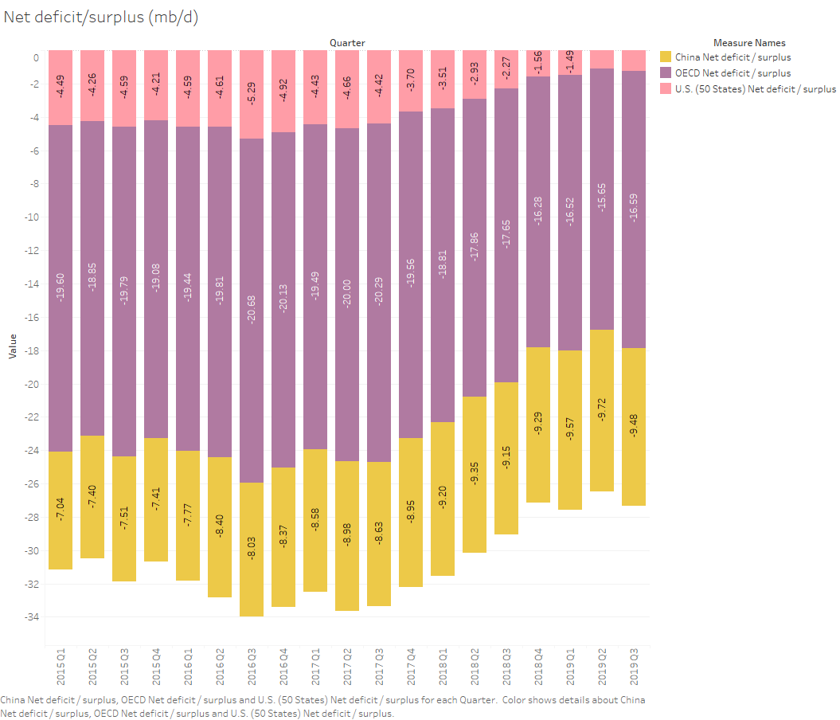

In [22]:
Image(r"C:\Users\yuvem\OneDrive\Pictures\net_deficit_surplus.png")

### Forecasting World Supply and Demand

These forecasts are unfortunately 100% trend and 0% seasonal.

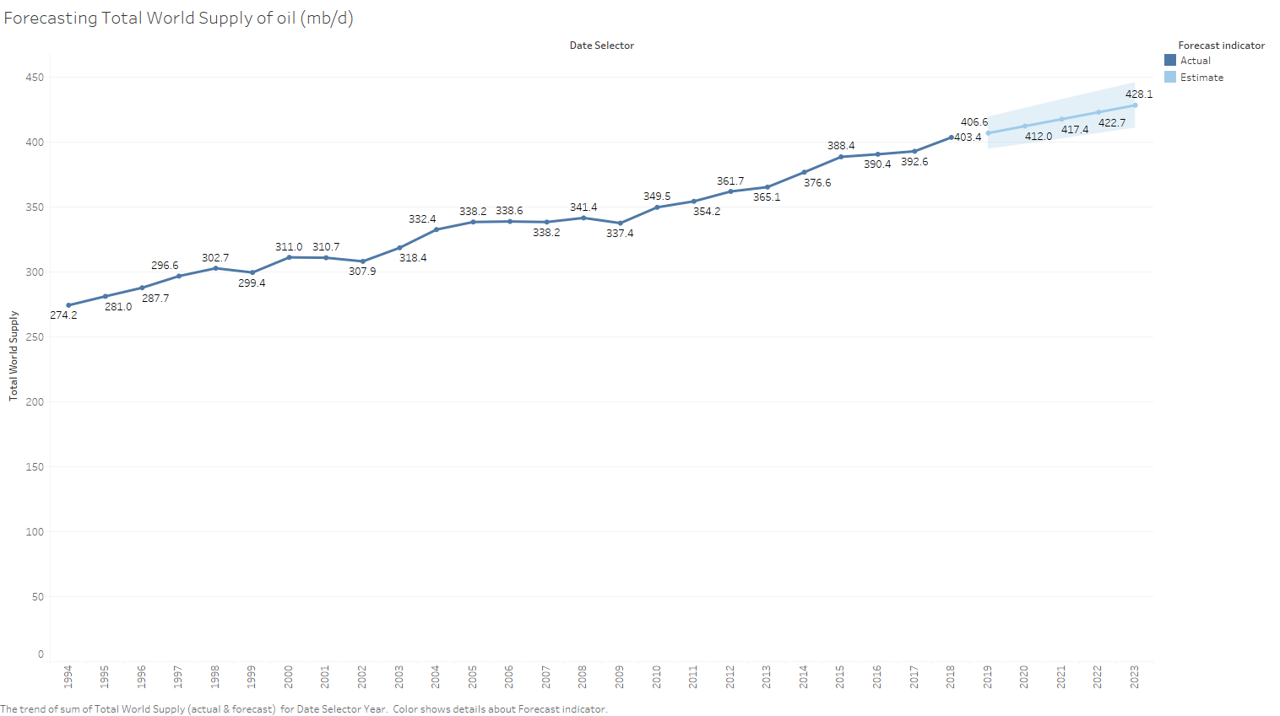

In [23]:
Image(r"C:\Users\yuvem\OneDrive\Pictures\forecast_world_supply.png")

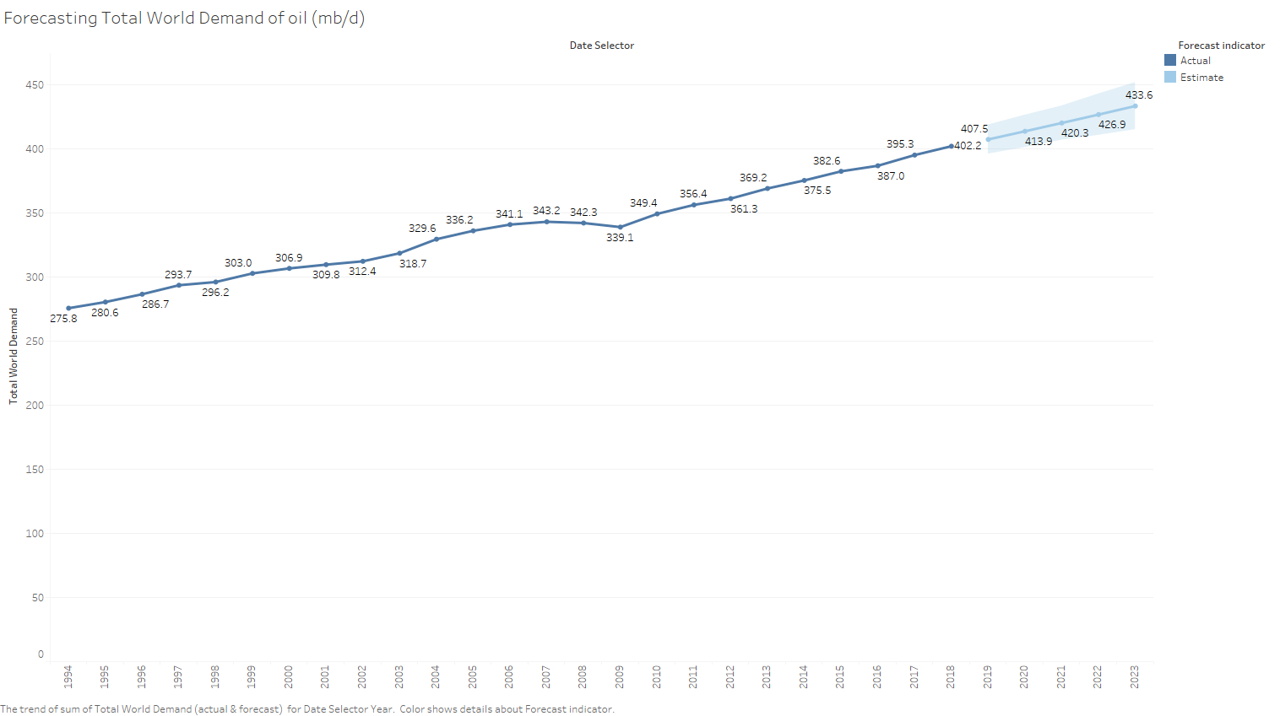

In [24]:
Image(r"C:\Users\yuvem\OneDrive\Pictures\forecast_world_demand.png")

## Reserves Estimation

Using this [AAPG Wiki](https://wiki.aapg.org/Reserves_estimation) page, I can target my desired parameters. Estimating hydrocarbon reserves is a complex process that involves integrating geological and engineering data. Depending on the amount and quality of data available, one or more of the following methods may be used to estimate reserves:
- Volumetric
- Material balance
- Production history
- Analogy

In [25]:
table = {'Method':  ['Volumetric', 'Material balance', 'Production history', 'Analogy'],
        'Application': ['OOIP, OGIP, recoverable reserves. Use early in life of field', 'OOIP, OGIP (assumes adequate production history available), recoverable reserves (assumes OOIP and OGIP known). Use in a mature field with abundant geological, petrophysical, and engineering data.','Recoverable reserves. Use after a moderate amount of production data is available.','OOIP, OGIP, recoverable reserves. Use early in exploration and initial field development.'],
         'Accuracy': ['Dependent on quality of reservoir description. Reserves estimates often high because this method does not consider problems of reservoir heterogeneity.','Highly dependent on quality of reservoir description and amount of production data available. Reserve estimates variable.','Dependent on amount of production history available. Reserve estimates tend to be realistic.','Highly dependent on similarity of reservoir characteristics. Reserve estimates are often very general.']
        }

table_reserveinfo = pd.DataFrame(table, index=['Method_1','Method_2', 'Method_3', 'Method_4'])
table_reserveinfo.head()

,Method,Application,Accuracy
Method_1,Volumetric,"OOIP, OGIP, recoverable reserves. Use early in...",Dependent on quality of reservoir description....
Method_2,Material balance,"OOIP, OGIP (assumes adequate production histor...",Highly dependent on quality of reservoir descr...
Method_3,Production history,Recoverable reserves. Use after a moderate amo...,Dependent on amount of production history avai...
Method_4,Analogy,"OOIP, OGIP, recoverable reserves. Use early in...",Highly dependent on similarity of reservoir ch...


Terminology: 
- OOIP = Original Oil in place
- OGIP = Original Gas in place

### WOR Forecasting and EUR

This WOR data comes from the [Argonne National Laboratory](https://publications.anl.gov/anlpubs/2009/07/64622.pdf), which is a study that reports hydrocarbon-specific water-oil ratios for 15 U.S. states. For the remainder of the States, the produced oil and water was used to calculate the WOR.  

I was unable to find data available in raw excel or csv format, however the tables were presented in the study. These tables I copied in Excel. 

EUR is estimate ultimate recovery and it is required for reservoir management. It's important to differentiate oil reserves and oil resources; oil resources is the sum of recoverable and unrecoverable volumes of oil in place, whereas oil reserves are amounts of oil anticipated to be commercially recoverable froma given datae under defined conditions (see paper for [Calculation of EUR form Oil and Water Production Data](http://www.ieomsociety.org/ieom2018/papers/367.pdf)). 

In [26]:
path2 = r'C:\Users\yuvem\OneDrive\Documents\GitHub\Personal-Capstone-Projects\Estimating when four natural resources will be depleted\Datasets\Report on Produced Water.xlsx'
print(path2)

C:\Users\yuvem\OneDrive\Documents\GitHub\Personal-Capstone-Projects\Estimating when four natural resources will be depleted\Datasets\Report on Produced Water.xlsx


In [27]:
xls = pd.ExcelFile(path2)
print(xls.sheet_names)

['Oil, Gas, Produced Water Gen', 'Water-to-Hydrocarbon Ratio', 'Produced Water Volume']


### Data Cleaning

In [28]:
# Data for oil, gas, produced water generation
oil_gas_h20_gen = pd.read_excel(xls, 'Oil, Gas, Produced Water Gen', header=[0])
# data for water-to-hydrocarbon ratio
water_hydrocarb = pd.read_excel(xls, 'Water-to-Hydrocarbon Ratio', header=[0])
# data for produced water volume
prod_h20_vol = pd.read_excel(xls, 'Produced Water Volume', header=[1])

In [29]:
oil_gas_h20_gen = oil_gas_h20_gen[['State','Crude Oil (bbl/year)','Total Gas (Mmcf)','Produced Water (bbl/year)']]

In [30]:
state_total = oil_gas_h20_gen[((oil_gas_h20_gen.State == 'State Total'))].index
fed_total = oil_gas_h20_gen[((oil_gas_h20_gen.State == 'Federal Total'))].index
us_total = oil_gas_h20_gen[((oil_gas_h20_gen.State == 'U.S. Total'))].index

oil_gas_h20_gen_index = oil_gas_h20_gen.drop(state_total)

In [31]:
oil_gas_h20_gen_indexed = oil_gas_h20_gen_index.drop(fed_total)

In [32]:
oil_gas_h20_gen_index_ = oil_gas_h20_gen_indexed.drop(us_total)

In [33]:
oil_gas_h20_gen_indexed_ = oil_gas_h20_gen_index_.set_index('State')

In [34]:
oil_gas_h20_gen_indexed_.dropna()

,Crude Oil (bbl/year),Total Gas (Mmcf),Produced Water (bbl/year)
State,,,
Alabama,5028000,285000.0,119004000
Alaska,263595000,3498000.0,801336000
Arizona,43000,1000.0,68000
Arkansas,6103000,272000.0,166011000
California,244000000,312000.0,2552194000
Colorado,2375000,1288000.0,383846000
Florida,2078000,2000.0,50296000
Indiana,1727000,4000.0,40200000
Kansas,36612000,371000.0,1244329000


In [35]:
oil_gas_h20_gen_index_ = oil_gas_h20_gen_indexed_[oil_gas_h20_gen_indexed_['Total Gas (Mmcf)'].notna()]

In [36]:
#

            Crude Oil (bbl/year)  Total Gas (Mmcf)  Produced Water (bbl/year)
State                                                                        
Alabama                  5028000          285000.0                  119004000
Alaska                 263595000         3498000.0                  801336000
Arizona                    43000            1000.0                      68000
Arkansas                 6103000          272000.0                  166011000
California             244000000          312000.0                 2552194000
Crude Oil (bbl/year)         0.0
Total Gas (Mmcf)             0.0
Produced Water (bbl/year)    0.0
dtype: float64
<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, Alabama to Tribal Lands
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Crude Oil (bbl/year)       31 non-null     int64  
 1   Total Gas (Mmcf)           31 non-null     float64
 2 

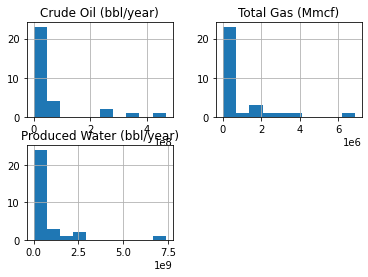

In [37]:
brief_summary(oil_gas_h20_gen_index_)

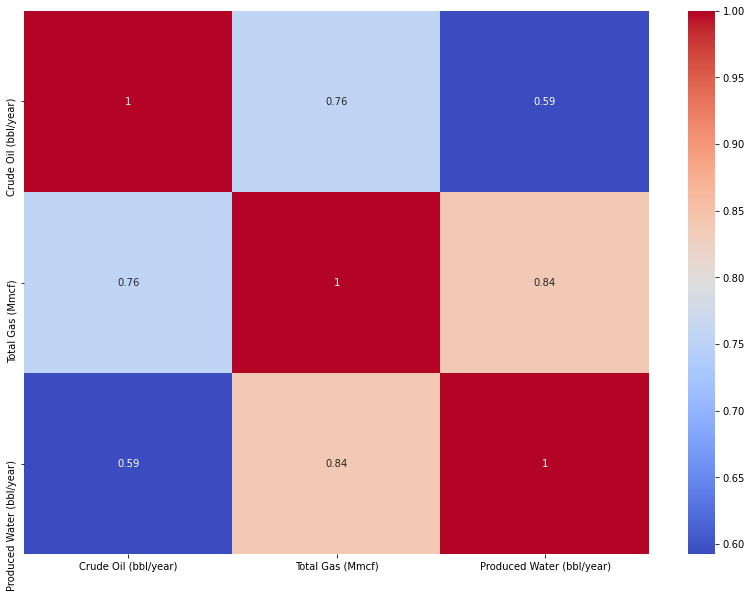

In [38]:
heat_map(oil_gas_h20_gen_index_)

In [39]:
# Cleaning water_hydrocarb dataset
water_hydrocarb = water_hydrocarb[['State','Water to Crude Oil (bbl/bbl)','Water to Gas (bbl/Mmcf)']]
water_hydrocarb_indexed = water_hydrocarb.set_index('State')
water_hydrocarb_indexed.dropna()

,Water to Crude Oil (bbl/bbl),Water to Gas (bbl/Mmcf)
State,,
Alabama,7.70,282.0
Alaska,2.90,4.4
California,10.50,7.6
Kansas,21.80,1208.0
Mississippi,13.50,35.9
Montana,4.00,453.0
Nebraska,20.90,358.0
New Mexico,9.00,91.5
North Dakota,3.00,18.0


            Water to Crude Oil (bbl/bbl)  Water to Gas (bbl/Mmcf)
State                                                            
Alabama                              7.7                    282.0
Alaska                               2.9                      4.4
California                          10.5                      7.6
Florida                             24.2                      NaN
Illinois                            42.7                      NaN
Water to Crude Oil (bbl/bbl)    0.055556
Water to Gas (bbl/Mmcf)         0.222222
dtype: float64
<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, Alabama to Total Ratio
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Water to Crude Oil (bbl/bbl)  17 non-null     float64
 1   Water to Gas (bbl/Mmcf)       14 non-null     float64
dtypes: float64(2)
memory usage: 432.0+ bytes
None
       Water to Crude Oil (bbl/bbl)  Water

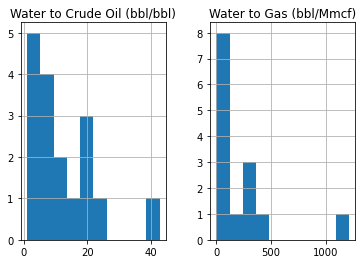

In [40]:
brief_summary(water_hydrocarb_indexed)

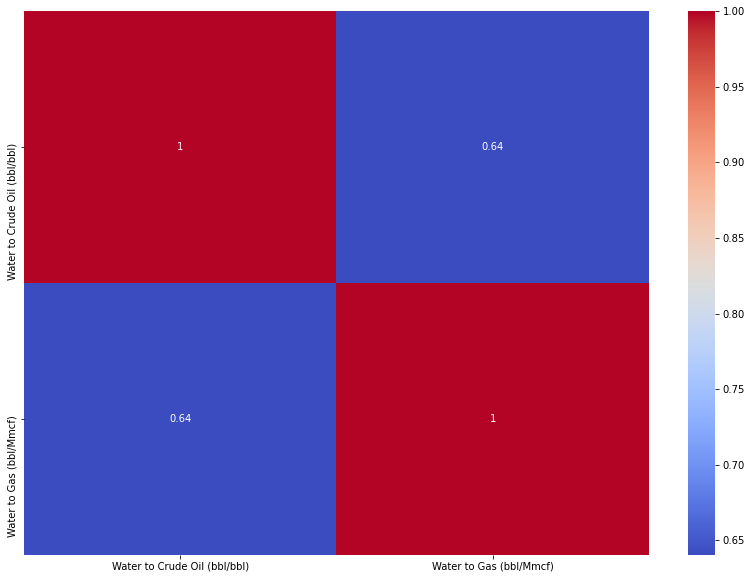

In [41]:
heat_map(water_hydrocarb_indexed)

In [42]:
# Cleaning prod_h20_vol dataset
prod_h20_vol = prod_h20_vol[['State','Injection for Enhanced Recovery','Injection or Disposal','Surface Discharge','Total Managed','Total Generated']]
prod_h20_vol_indexed = prod_h20_vol.set_index('State')
prod_h20_vol_indexed.dropna()

,Injection for Enhanced Recovery,Injection or Disposal,Surface Discharge,Total Managed,Total Generated
State,,,,,
Alabama,7.500000e+06,3.300000e+07,78000000.0,1.190000e+08,119004000
Alaska,1.037909e+09,3.991400e+07,35480000.0,1.113302e+09,801336000
Nebraska,3.158800e+07,1.433700e+07,500000.0,4.931200e+07,49312000
South Dakota,2.122000e+06,1.853000e+06,85000.0,4.146000e+06,4186000
Utah,7.825100e+07,6.205100e+07,21080000.0,1.731450e+08,148579000
State Total,1.067653e+10,7.144071e+09,139002000.0,1.805853e+10,20258560000
Federal Offshore,4.867300e+07,1.298000e+06,537381000.0,5.873530e+08,587353000
Total,1.072520e+10,7.145369e+09,676383000.0,1.864588e+10,20995174000


In [43]:
prod_h20_vol_index = prod_h20_vol_indexed.dropna(how='any')

              Injection for Enhanced Recovery  Injection or Disposal  \
State                                                                  
Alabama                          7.500000e+06             33000000.0   
Alaska                           1.037909e+09             39914000.0   
Nebraska                         3.158800e+07             14337000.0   
South Dakota                     2.122000e+06              1853000.0   
Utah                             7.825100e+07             62051000.0   

              Surface Discharge  Total Managed  Total Generated  
State                                                            
Alabama              78000000.0   1.190000e+08        119004000  
Alaska               35480000.0   1.113302e+09        801336000  
Nebraska               500000.0   4.931200e+07         49312000  
South Dakota            85000.0   4.146000e+06          4186000  
Utah                 21080000.0   1.731450e+08        148579000  
Injection for Enhanced Recovery  

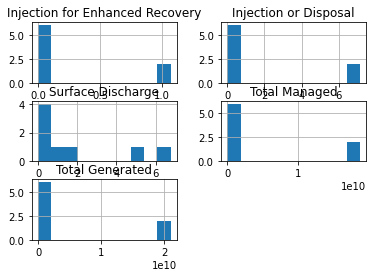

In [44]:
brief_summary(prod_h20_vol_index)

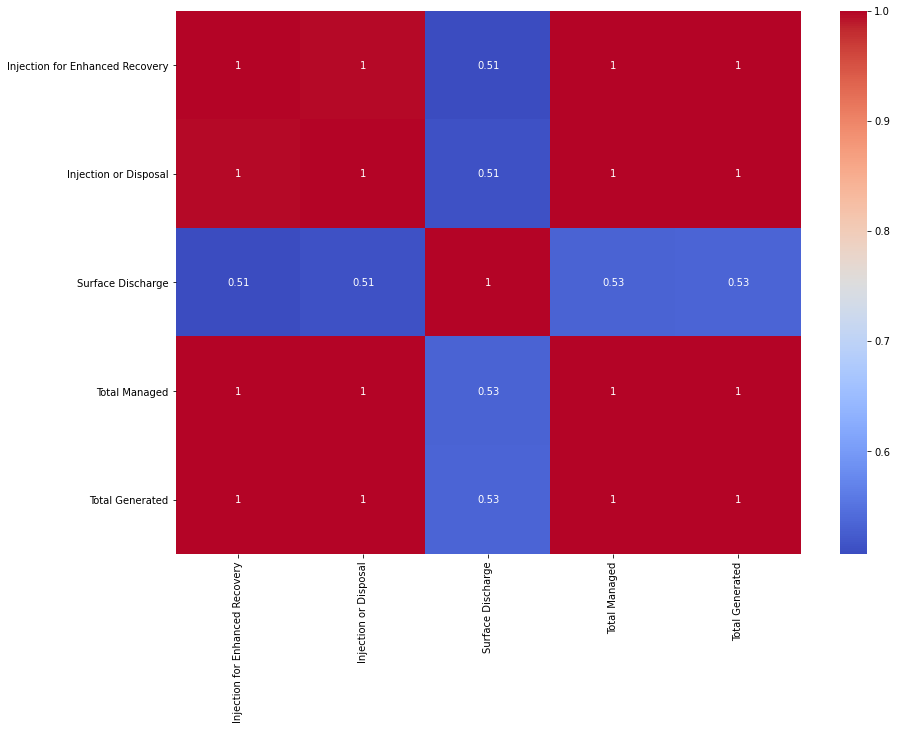

In [45]:
heat_map(prod_h20_vol_index)

### Production decline analysis (DCA)

In [46]:
len(oil_gas_h20_gen_index_) * .75, len(oil_gas_h20_gen_index_) * .25

(23.25, 7.75)

In [47]:
X_train0, X_test0, y_train0, y_test0 = train_test_split(oil_gas_h20_gen_index_.drop(columns='Crude Oil (bbl/year)'), 
                                                    oil_gas_h20_gen_index_['Crude Oil (bbl/year)'], test_size = 0.25, 
                                                    random_state=12345)

In [48]:
predicted_values0 = lin_reg(X_train0, X_test0, X_train0, X_test0)

R2 1.0
RMSE: 2.8744111503786724e-16
Average Volume of Predicted Reserve: -0.41069268030376976


In [49]:
from sklearn.dummy import DummyRegressor

dumb_reg = DummyRegressor(strategy='mean')
dumb_reg.fit(X_train0, y_train0)
dumb_reg.constant_

array([[70184782.60869566]])

In [50]:
y_tr_pred = dumb_reg.predict(X_train0)
y_tr_pred[:5]

array([70184782.60869566, 70184782.60869566, 70184782.60869566,
       70184782.60869566, 70184782.60869566])

In [51]:
def mae(y, ypred):
    """Mean absolute error.
    
    Calculate the mean absolute error of the arguments

    Arguments:
    y -- the observed values
    ypred -- the predicted values
    """
    abs_error = np.abs(y - ypred)
    mae = np.mean(abs_error)
    return mae

In [52]:
mae(y_train0, y_tr_pred)

90097640.83175804

### Creating a new model

In [53]:
# assigning x and y values
y = oil_gas_h20_gen_index_.iloc[:,0].values
y

array([  5028000, 263595000,     43000,   6103000, 244000000,   2375000,
         2078000,   1727000,  36612000,   3572000,  52495000,   5180000,
        20027000,  34749000,   2335000,    408000,  59138000,    378000,
        44543000,   5422000,  60760000,   1537000,   1665000,    350000,
       342087000,  19520000,     19000,    679000,  54052000, 467180000,
         9513000], dtype=int64)

In [54]:
x1 = oil_gas_h20_gen_index_.iloc[:,-1].values
x1

array([ 119004000,  801336000,      68000,  166011000, 2552194000,
        383846000,   50296000,   40200000, 1244329000,   24607000,
       1149643000,  114580000,  330730000,  182266000,   49312000,
          6785000,  665685000,     649000,  134991000,    6940000,
       2195180000,    3912000,    4186000,    2263000, 7376913000,
        148579000,    1562000,    8337000, 2355671000,  587353000,
        149261000], dtype=int64)

In [55]:
# changing the dimensionality of x
x = np.reshape(x1,(-1,1))
x

array([[ 119004000],
       [ 801336000],
       [     68000],
       [ 166011000],
       [2552194000],
       [ 383846000],
       [  50296000],
       [  40200000],
       [1244329000],
       [  24607000],
       [1149643000],
       [ 114580000],
       [ 330730000],
       [ 182266000],
       [  49312000],
       [   6785000],
       [ 665685000],
       [    649000],
       [ 134991000],
       [   6940000],
       [2195180000],
       [   3912000],
       [   4186000],
       [   2263000],
       [7376913000],
       [ 148579000],
       [   1562000],
       [   8337000],
       [2355671000],
       [ 587353000],
       [ 149261000]], dtype=int64)

In [56]:
# calling the classifier
classifier=LinearRegression()

In [57]:
# training the datasets
classifier.fit(x,y)

LinearRegression()

In [58]:
##finding the slope
classifier.coef_

array([0.04661332])

In [59]:
##finding intercept
classifier.intercept_

24999050.88142838

In [60]:
##checking accuracy
classifier.score(x,y)*100

35.04896054399054

In [61]:
#predictting y value
y_prediction=classifier.predict([[15]])
crude_oil =y_prediction
crude_oil

array([24999051.58062811])

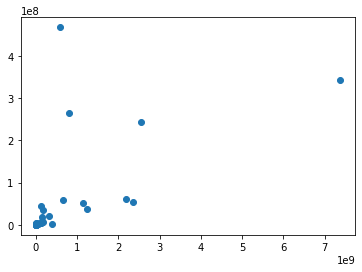

In [62]:
# Plot
plt.scatter(x,y)

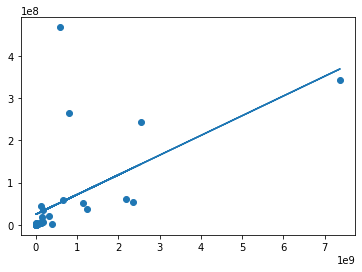

In [63]:
plt.scatter(x,y)
plt.plot(x,classifier.predict(x))
plt.show()

In [64]:
# Result
print("Total average crude oil (bbl/year)= ",crude_oil,"MMSCF")

Total average crude oil (bbl/year)=  [24999051.58062811] MMSCF


In [69]:
#normalization
#x_train_N = (X_train-X_train.mean())/(X_train.max()-X_train.min())
#x_test_N = (X_test-X_test.mean())/(X_test.max()-X_test.min())

In [ ]:
#

In [ ]:
x_train_N.shape, x_test_N.shape

In [ ]:
y_train.shape, y_test.shape

In [ ]:
#normalization
y_train_N = (y_train-y_train.mean())/(y_train.max()-y_train.min())
y_test_N = (y_test-y_test.mean())/(y_test.max()-y_test.min())

## Monte Carlo Simulation

The essence of a Monte Carlo simulation is it is simulations evolving randomly. In the law of large numbers, an average tends to come closer to its expected value the more samples there are. In Monte Carlo simulation, we want to get an unbiased representative group of samples from a large pool if we allow simulation to evolve randomly. One relevant use for this stochastic tool is for hydrocarbon resource estimation (probabilistic hydrocarbon reserves estimation). In this probabilistic method, a fit distribution curve for each parameter is introduced and through a Monte Carlo simulation, a distribution curve for the result (reserves) can be developed. 

An equation for calculating oil reserve is as follows: 

**N = [A*h*φ*(1-Sw)/B0]**

N = volumetric oil reserve (or OOIP)
A = area (m2)
h = Thickness (or net pay thickness, m)
φ = porosity (fraction)
Sw = water saturation
B0 = Formation Volume Factor (RB/STB) 

In Monte Carlo simulator these most likely, minimum possible and maximum possible values for each parameter is entered. After that when simulator is initiated it generates 100/500/1000 values (depending up on the iteration level) based on random number generator algorithm for each parameter within the range specified and creates a probabilistic picture of the volumetric reserve estimation. Finally simulator provides P90, P50, P25, P10 values of reserve or what ever probabilistic value of reserve we want.

In [67]:
path3 = r'C:\Users\yuvem\OneDrive\Documents\GitHub\Personal-Capstone-Projects\Estimating when four natural resources will be depleted\Datasets\Orinoco data.xlsx'
xls3 = pd.ExcelFile(path3)
orinoco_ds = pd.read_excel(xls3,  header=[0])

In [68]:
orinoco_ds 

,Unnamed: 0,Minimum,Median,Maximum
0,Orinoco oil-in-place (BBO),900.00,1300.00,1400.00
1,Recovery factor (%),15.00,45.00,70.00
2,Net oil-saturated sandstone thickness,1.00,150.00,350.00
3,Porosity (%),20.00,25.00,38.00
4,Water saturation (%),10.00,20.00,25.00
5,Formation Volume Factor,1.05,1.06,1.08
6,Gas/Oil Ratio (scf/bbl),80.00,110.00,600.00


In [ ]:
!pip install montepetro

In [ ]:
from montepetro.models import Model
from montepetro.properties import RandomProperty, OriginalOilInPlace, ModelOriginalOilInPlace
from montepetro.regions import Region

In [ ]:
seed = 300
model = Model("A simple reservoir model", seed)

### Particle Swarm optimization

In [ ]:
#

### Type curve analysis

### Seismic Impact of Wastewater Injection Wells